In [46]:
import scipy
import numpy as np
import pandas as pd
import warnings as wn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import *
from sklearn import *
from sklearn.svm import *
from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.feature_selection import *

wn.filterwarnings("ignore")
np.random.seed(0)

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')
pd.set_option('display.max_columns', None)
df = df.fillna(df.mean())

In [28]:
x = df.drop(columns = ['rating', 'title', 'calories', 'protein', 'fat', 'sodium'])
y = df.rating

In [29]:
pca = PCA(n_components=30, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [30]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.1)

In [31]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(train_x, train_y)
print(grid.best_params_)

CPU times: user 15min, sys: 8.56 s, total: 15min 8s
Wall time: 14min 45s
{'svc__C': 50, 'svc__gamma': 0.005}


In [32]:
model = grid.best_estimator_
yfit = model.predict(test_x)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

              precision    recall  f1-score   support

         0.0       0.48      0.57      0.52       764
         1.0       0.70      0.62      0.66      1242

   micro avg       0.60      0.60      0.60      2006
   macro avg       0.59      0.59      0.59      2006
weighted avg       0.62      0.60      0.60      2006



Text(91.68, 0.5, 'predicted label')

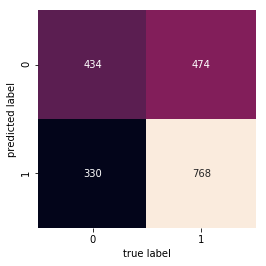

In [47]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_y, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')